In [1]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
# loading the dataset
df = pd.read_csv('Walmart_Store_sales.csv')


In [3]:
# initial view of the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [75]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [76]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [77]:
profile.to_widgets()

1. Store with maximum sales

In [78]:
# store #14 has the maximum weekly sales amount. maximum amount is 3,818,686.45.
df.loc[df['Weekly_Sales'] ==  df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


2. Store with the maximum standard deviation and coefficent of variance

In [79]:
maxstd=pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

In [80]:
print(maxstd)

        Weekly_Sales              
                 std          mean
Store                             
1      155980.767761  1.555264e+06
2      237683.694682  1.925751e+06
3       46319.631557  4.027044e+05
4      266201.442297  2.094713e+06
5       37737.965745  3.180118e+05
6      212525.855862  1.564728e+06
7      112585.469220  5.706173e+05
8      106280.829881  9.087495e+05
9       69028.666585  5.439806e+05
10     302262.062504  1.899425e+06
11     165833.887863  1.356383e+06
12     139166.871880  1.009002e+06
13     265506.995776  2.003620e+06
14     317569.949476  2.020978e+06
15     120538.652043  6.233125e+05
16      85769.680133  5.192477e+05
17     112162.936087  8.935814e+05
18     176641.510839  1.084718e+06
19     191722.638730  1.444999e+06
20     275900.562742  2.107677e+06
21     128752.812853  7.560691e+05
22     161251.350631  1.028501e+06
23     249788.038068  1.389864e+06
24     167745.677567  1.356755e+06
25     112976.788600  7.067215e+05
26     110431.288141

In [81]:
maxstd = maxstd.reset_index()

In [82]:
maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

In [83]:
# store #14 has the maximum standard deviation with a CoV of 15.71
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

3. Stores with the largest quarterly growth rate in Q3'2012

In [84]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [85]:
# date is now converted to datetime
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [86]:
# defining the start and end dates of Q3 and Q2
Q3_date_start = pd.Timestamp(date(2012,7,1))
Q3_date_end = pd.Timestamp(date(2012,9,30))

Q2_date_start = pd.Timestamp(date(2012,4,1))
Q2_date_end = pd.Timestamp(date(2012,6,30))

In [87]:
# collecting data for Q3 and Q2 from original dataset
Q2data=df[(df['Date'] > Q2_date_start) & (df['Date'] < Q2_date_end)]
Q3data=df[(df['Date'] > Q3_date_start) & (df['Date'] < Q3_date_end)]

In [88]:
#finding the weekly sales total of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns = {'Weekly_Sales': 'Q2_Weekly_Sales'}, inplace=True)
Q2

,Store,Q2_Weekly_Sales
0,1,21036965.58
1,2,25085123.61
2,3,5562668.16
3,4,28384185.16
4,5,4427262.21
5,6,20728970.16
6,7,7613593.92
7,8,11934275.61
8,9,7431320.13
9,10,23598433.93


In [89]:
#finding the weekly sales total of each store in Q3
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns = {'Weekly_Sales': 'Q3_Weekly_Sales'}, inplace=True)
Q3

,Store,Q3_Weekly_Sales
0,1,18633209.98
1,2,22396867.61
2,3,4966495.93
3,4,25652119.35
4,5,3880621.88
5,6,18341221.11
6,7,7322393.92
7,8,10873860.34
8,9,6528239.56
9,10,21169356.45


In [90]:
#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')
Q3_Growth

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales
0,1,21036965.58,18633209.98
1,2,25085123.61,22396867.61
2,3,5562668.16,4966495.93
3,4,28384185.16,25652119.35
4,5,4427262.21,3880621.88
5,6,20728970.16,18341221.11
6,7,7613593.92,7322393.92
7,8,11934275.61,10873860.34
8,9,7431320.13,6528239.56
9,10,23598433.93,21169356.45


In [91]:
#Calculating Growth rate of each Store and collecting it into a dataframe  
#store #16 has the minimum loss in growth rate
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [92]:
#store #14 has the maximum loss in growth rate with an 18% descrease in sales
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)


,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


4. Find the holidays that have a negative or positive impact on sales.

In [93]:
#finding the mean sales of non holiday and holiday 
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [94]:
# listing the holiday dates
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

In [97]:
# Christmas sales
Christmas_mean_sales=df[(df['Date'] == Christmas1) | 
(df['Date'] == Christmas2) | (df['Date'] == Christmas3) | 
(df['Date'] == Christmas4)]


In [99]:
# Thanskgiving sales
Thanksgiving_mean_sales=df[(df['Date'] == Thanksgiving1) |
(df['Date'] == Thanksgiving2) | (df['Date'] == Thanksgiving3) | 
(df['Date'] == Thanksgiving4)]

In [101]:
# Labour Day sales
LabourDay_mean_sales=df[(df['Date'] == LabourDay1) | 
(df['Date'] == LabourDay2) | (df['Date'] == LabourDay3) | 
(df['Date'] == LabourDay4)]

In [103]:
# SuperBowl sales
SuperBowl_mean_sales=df[(df['Date'] == SuperBowl1) | 
(df['Date'] == SuperBowl2) | (df['Date'] == SuperBowl3) |
(df['Date'] == SuperBowl4)]


In [109]:
# calculation of holiday mean sales
import json
list_of_mean_sales = {'Christmas_mean_sales' : 
round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
                      
'Thanksgiving_mean_sales':
round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),     
                      
'LabourDay_mean_sales' : 
round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),     
                      
'SuperBowl_mean_sales':
round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),   
                      
'Non holiday weekly sales' : df[df['Holiday_Flag'] == 0 ]
['Weekly_Sales'].mean()}            
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

5. Provide a monthly, quarterly and semester visualization of sales

Text(0, 0.5, 'Weekly_Sales')

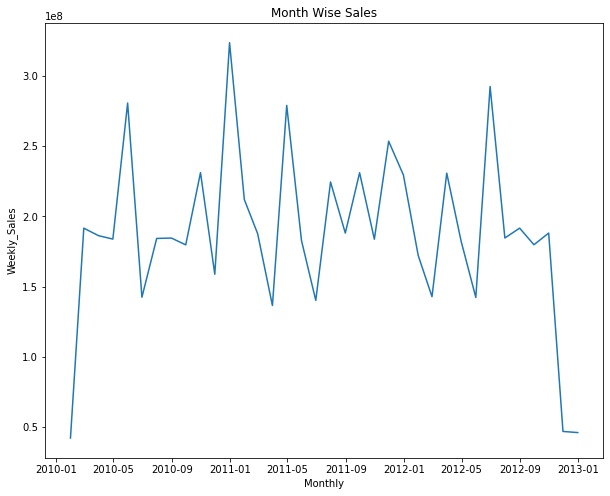

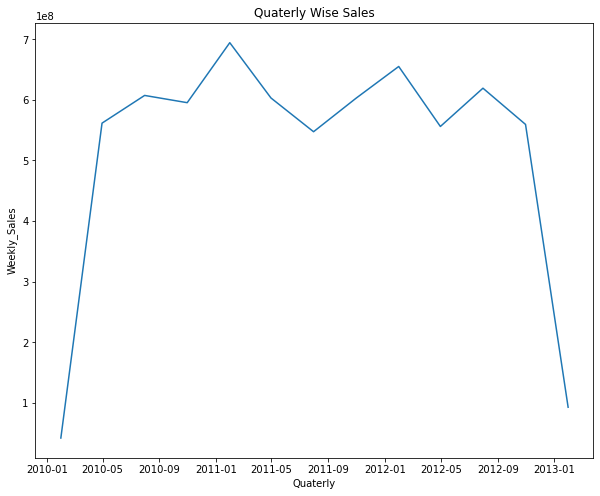

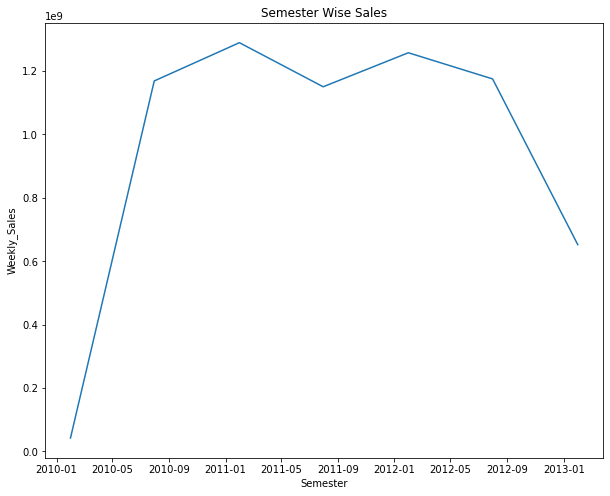

In [117]:
# monthly sales
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

#quarterly sales
Quaterly = df.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

# semester sales
Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

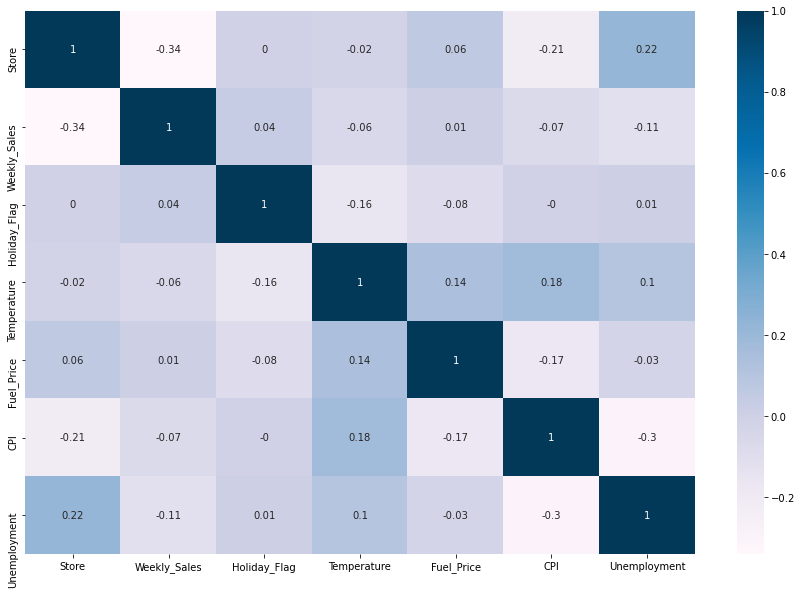

In [114]:
corr_map = df.corr().round(2)
plt.subplots(figsize=(15,10))
sns.heatmap(data=corr_map,cmap='PuBu', annot=True)
plt.show()